# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 1898
Number of columns: 9


#### Observations:
There are 1,898 rows and only 9 columns. Looking at the numbers, the dataset is relatively small so computations should be rather quick and efficient.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The data types of these columns are as follows:

<p><b>order_id, customer_id, food_preparation_time, and delivery_time </b>are of type <b>int64</b>. 
These columns contain integer values.<p>

<p><b>cost_of_the_order </b>is of type <b>float64</b>. This column likely contains floating-point (decimal) values representing the cost of the order.<p>

<p><b>restaurant_name, cuisine_type, day_of_the_week, and rating </b>are of type <b>object</b>, which typically means they contain text or string data.<p>

<p>These observations provide a summary of the data types present in the dataset, which can be useful for further data analysis and processing.<p>

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Check for any missing values in the dataframe.
missing_values = df.isna().sum()

# Print the count of missing of values for each column.
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There are no missing values in the data. No steps are required to treat for null/missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Get the statistical summary of the data.
summary = df.describe()

# Print the summary
print(summary)

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations:
<p>The minimum time it takes for food to be prepared can be seen under food_preparation_time and its min value of 20. Meaning it takes at least 20 minutes to prepare food. 
<p>The maximum time it takes food to be prepared is 35, meaning it can take up to 35 minutes for food to be prepared. 
<p>The average time it take for food to be prepared can be seen with the mean value of 27.37 minutes. 


### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here

# Count the number of orders with a rating of "Not Given"
not_rated_count = df[~df['rating'].str.isnumeric()]['order_id'].count()

# Print the result
print(f"Number of orders not rated: {not_rated_count}")

Number of orders not rated: 736


#### Observations:
There are 736 orders that have not been rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Number of unique orders: 1898
Number of unique customers: 1200
Number of unique restaurants: 178


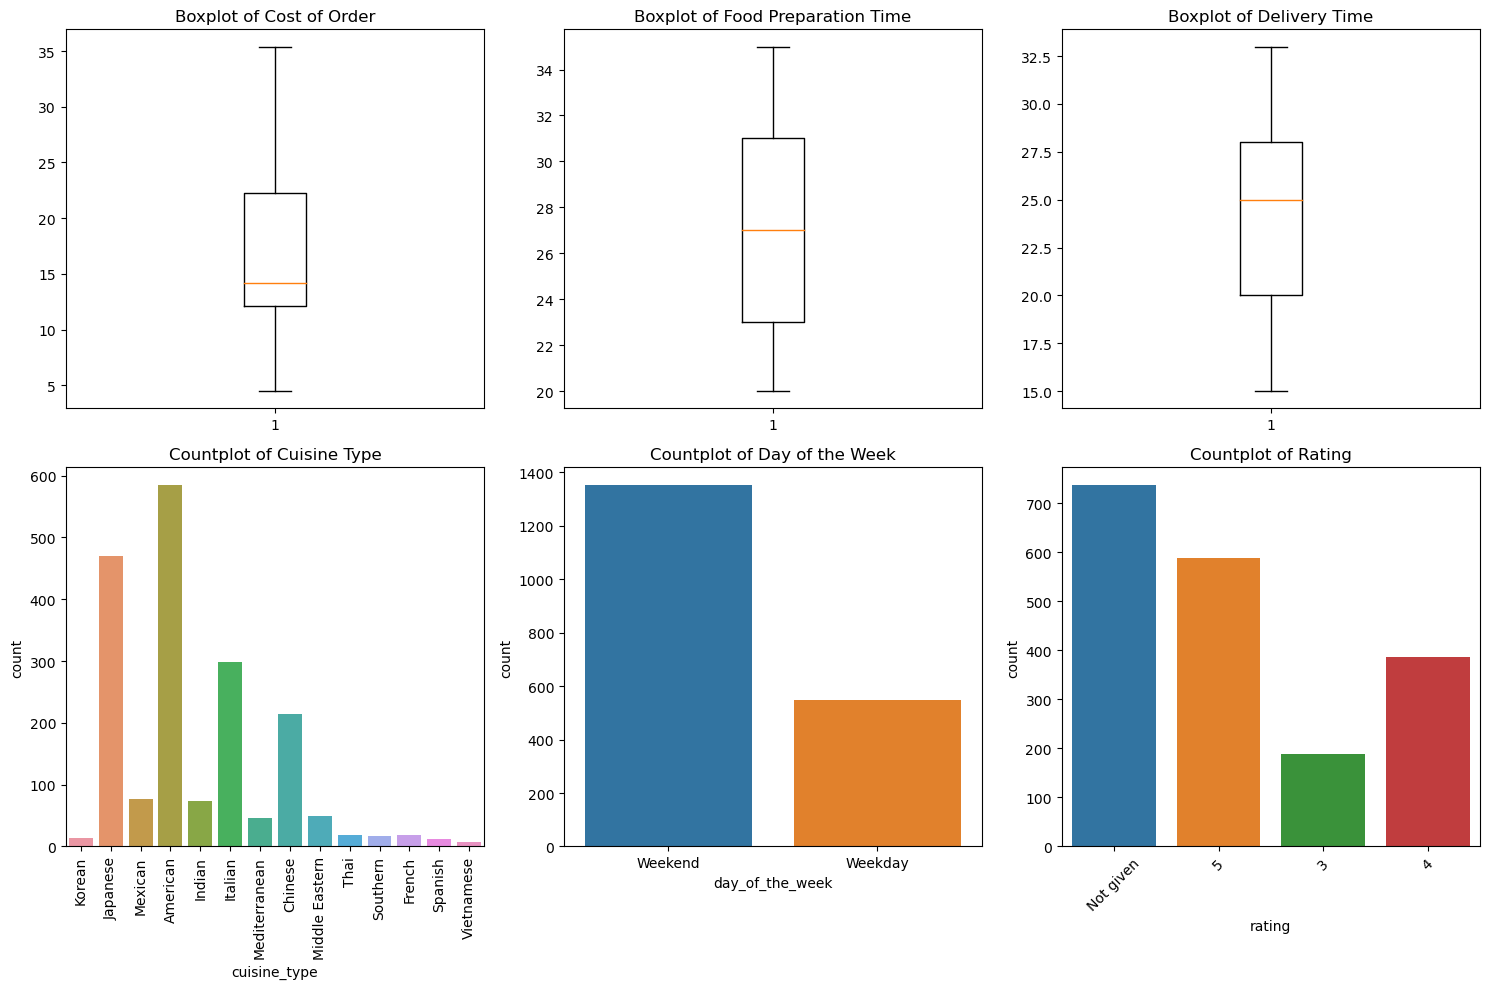

In [9]:
unique_order_id = df['order_id'].nunique()
unique_customer_id = df['customer_id'].nunique()
unique_restaurants = df['restaurant_name'].nunique()

print ("Number of unique orders:", unique_order_id)
print ("Number of unique customers:", unique_customer_id)
print ("Number of unique restaurants:", unique_restaurants)
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Boxplot for "cost_of_the_order"
axes[0,0].boxplot(df['cost_of_the_order'])
axes[0,0].set_title('Boxplot of Cost of Order')

# Histogram for "food_preparation_time"
axes[0,1].boxplot(df['food_preparation_time'])
axes[0,1].set_title('Boxplot of Food Preparation Time')


# Histogram for "delivery_time"
axes[0,2].boxplot(df['delivery_time'])
axes[0,2].set_title('Boxplot of Delivery Time')

# Create countplots for categorical columns
sns.countplot(data=df, x='cuisine_type', ax=axes[1, 0])
axes[1, 0].set_title('Countplot of Cuisine Type')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x='day_of_the_week', ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Day of the Week')

sns.countplot(data=df, x='rating', ax=axes[1, 2])
axes[1, 2].set_title('Countplot of Rating')
axes[1, 2].tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

#### Observations:
- Cost of Orders: 
    - Min: About 5 Dollars
    - Max: About 35 dollars
    - 25%: About 12 Dollars
    - Median: About 14 dollars
    - 75%: About 22 Dollars
- Food Prep Time: 
    - Min: 20 minutes
    - Max: About 35 minutes
    - 25%: About 23 minutes
    - Median: About 27 minutes
    - 75%: About 31 minutes
- Delivery Time: 
    - Min: 15 minutes
    - Max: About 33 minutes
    - 25%: 20 minutes
    - Median: 25 minutes
    - 75%: About 28 minutes
- Cuisine Type: 
    - American food is the most popular cuisine type
    - Japanese is the second most popular
    - The number of differnet cuisines ordered differ greatly from American and Japanese food. 
- Days of the Week:
    - Food is more commonly ordered on weekends compared to weekdays
- Ratings: 
    - Out of the orders that have been rated, most are 5 stars
    - There is a large amount of orders that have not been rated. 736 to be exact, which is 


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

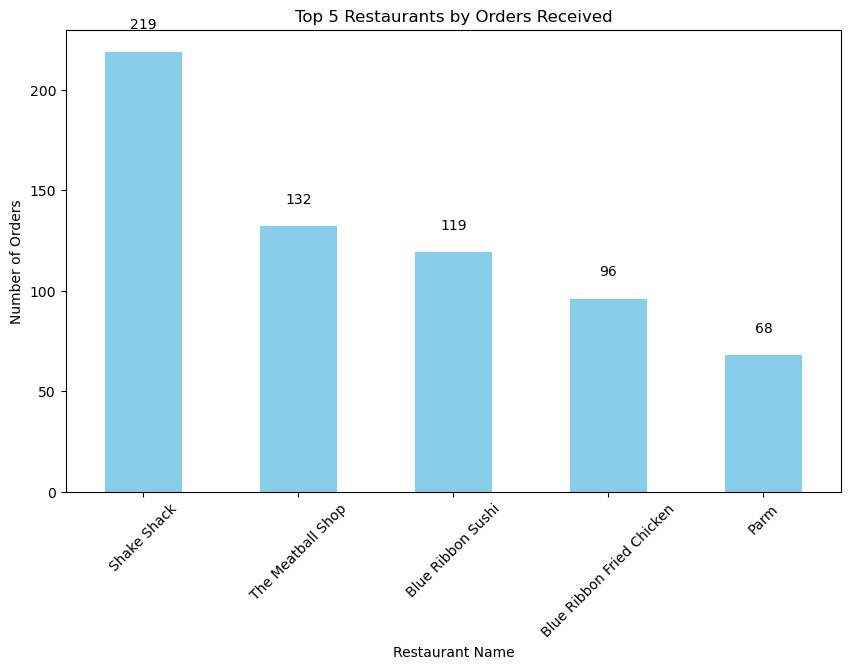

In [10]:
# Group the data by restaurant name and count the number of orders for each restaurant
restaurant_orders = df['order_id'].groupby(df['restaurant_name']).count()

# Sort the restaurants by the number of orders in descending order and select the top 5
top_restaurants = restaurant_orders.sort_values(ascending=False).head(5)

# Create a bar graph to visualize the top 5 restaurants
plt.figure(figsize=(10, 6))
ax = top_restaurants.plot(kind='bar', color='skyblue')
plt.title('Top 5 Restaurants by Orders Received')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate the values of each bar
for i, v in enumerate(top_restaurants):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

#### Observations:
The top 5 restaurants in terms of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

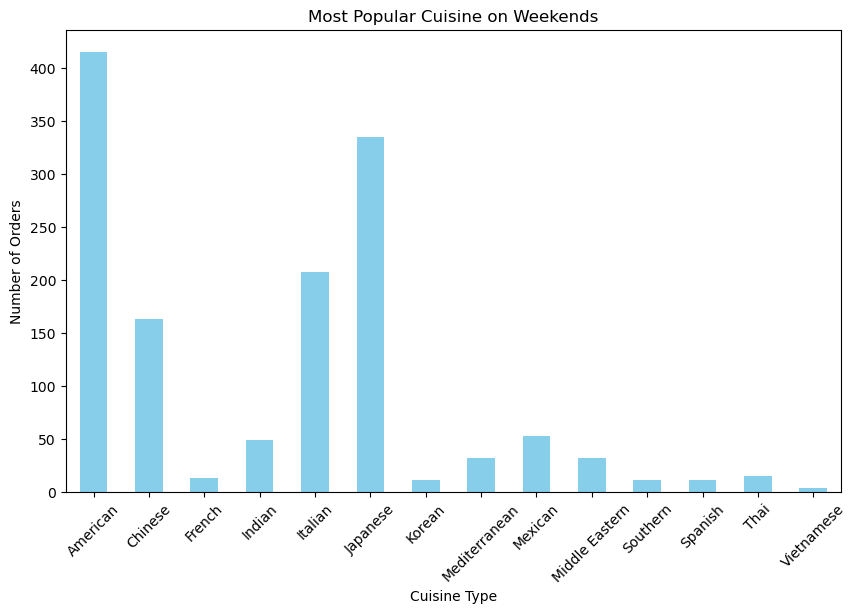

In [11]:
# Filter the data for weekends (you may need to adjust the day of the week column)
weekend_data = df[df['day_of_the_week'].isin(['Weekend'])]

# Group the data by cuisine type and count the number of orders
cuisine_counts = weekend_data['order_id'].groupby(weekend_data['cuisine_type']).count()

# Identify the most popular cuisine
most_popular_cuisine = cuisine_counts.idxmax()

# Create a bar chart
plt.figure(figsize=(10, 6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Most Popular Cuisine on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Observations:
It is clear from the bar chart above, the most ordered cuisine on weekends is American food.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

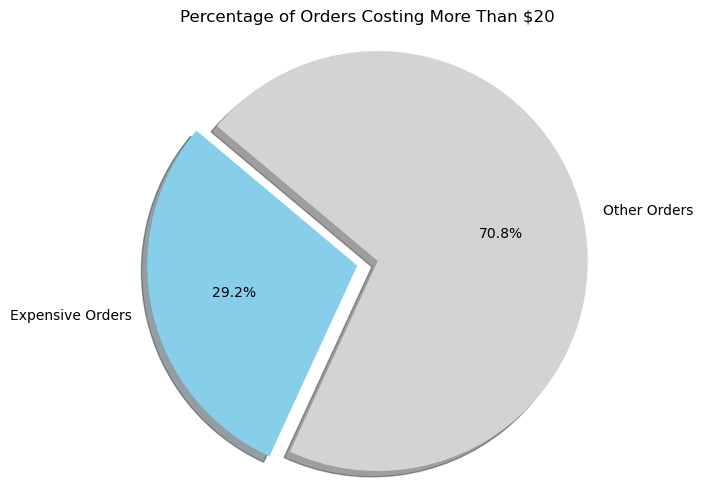

In [12]:
# Filter the data to include only orders with a cost greater than $20
expensive_orders = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of expensive orders
percentage_expensive = (len(expensive_orders) / len(df)) * 100

# Create a pie chart to visualize the percentage of expensive orders
plt.figure(figsize=(6, 6))
labels = ['Expensive Orders', 'Other Orders']
sizes = [percentage_expensive, 100 - percentage_expensive]
colors = ['skyblue', 'lightgray']
explode = (0.1, 0)  # Explode the first slice (Expensive Orders)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Orders Costing More Than $20')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Observations:
Based on the pie chart above, about 29.2% of orders cost more than $20. While it is expected, I believe more can be done to help bring the percentage of 'expensive orders' up to bring in more revenue. 

### **Question 10**: What is the mean order delivery time? [1 mark]

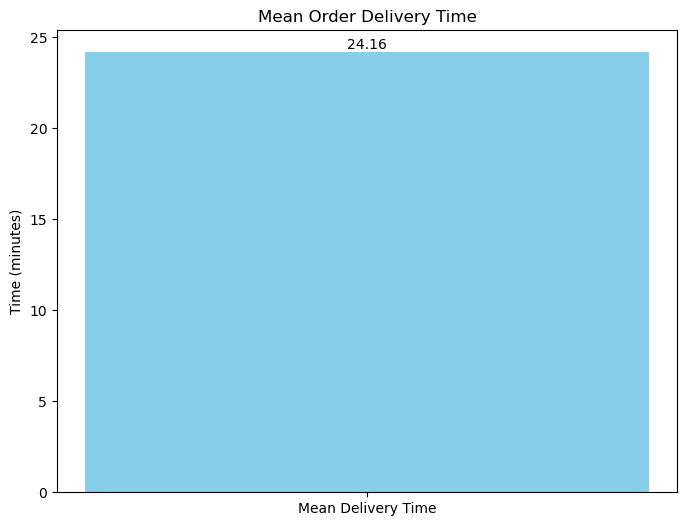

In [13]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

# Create a bar chart to visualize the mean delivery time
plt.figure(figsize=(8, 6))
plt.bar(['Mean Delivery Time'], [mean_delivery_time], color='skyblue')
plt.title('Mean Order Delivery Time')
plt.ylabel('Time (minutes)')

# Annotate the bar with the mean delivery time
plt.annotate(f'{mean_delivery_time:.2f}', xy=('Mean Delivery Time', mean_delivery_time), ha='center', va='bottom')

plt.show()

#### Observations:
The mean, or average delivery time is about 24.16 minutes. (24 minutes and 9.6 seconds)

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

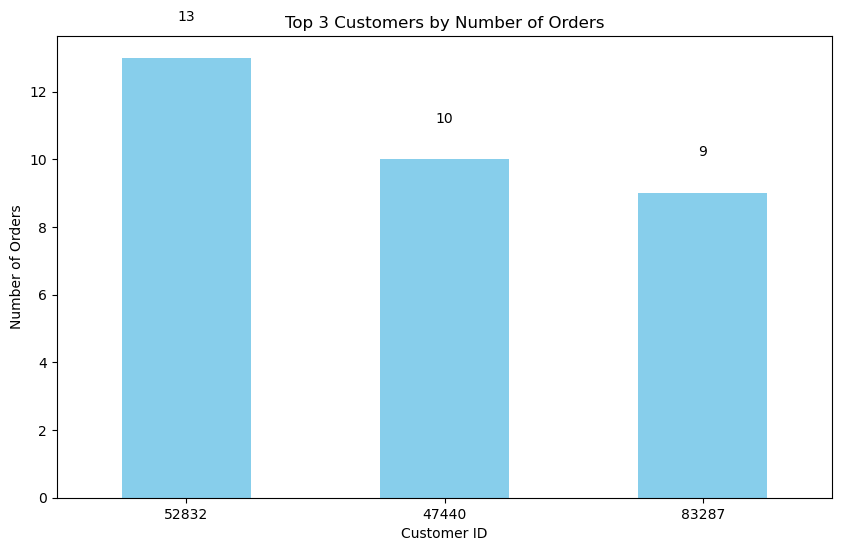

In [14]:
# Group the data by customer ID and count the number of orders
customer_orders = df['order_id'].groupby(df['customer_id']).count()

# Sort the customers by the number of orders in descending order and select the top 3
top_customers = customer_orders.sort_values(ascending=False).head(3)

# Create a bar chart to visualize the number of orders for the top 3 customers
plt.figure(figsize=(10, 6))
ax = top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 3 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels as needed

# Annotate the bars with the number of orders
for i, v in enumerate(top_customers):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

#### Observations:
The top 3 most frequent customers are Customer ID: 52832, 47440, and 83287. They have ordered 13, 10, and 9 items respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


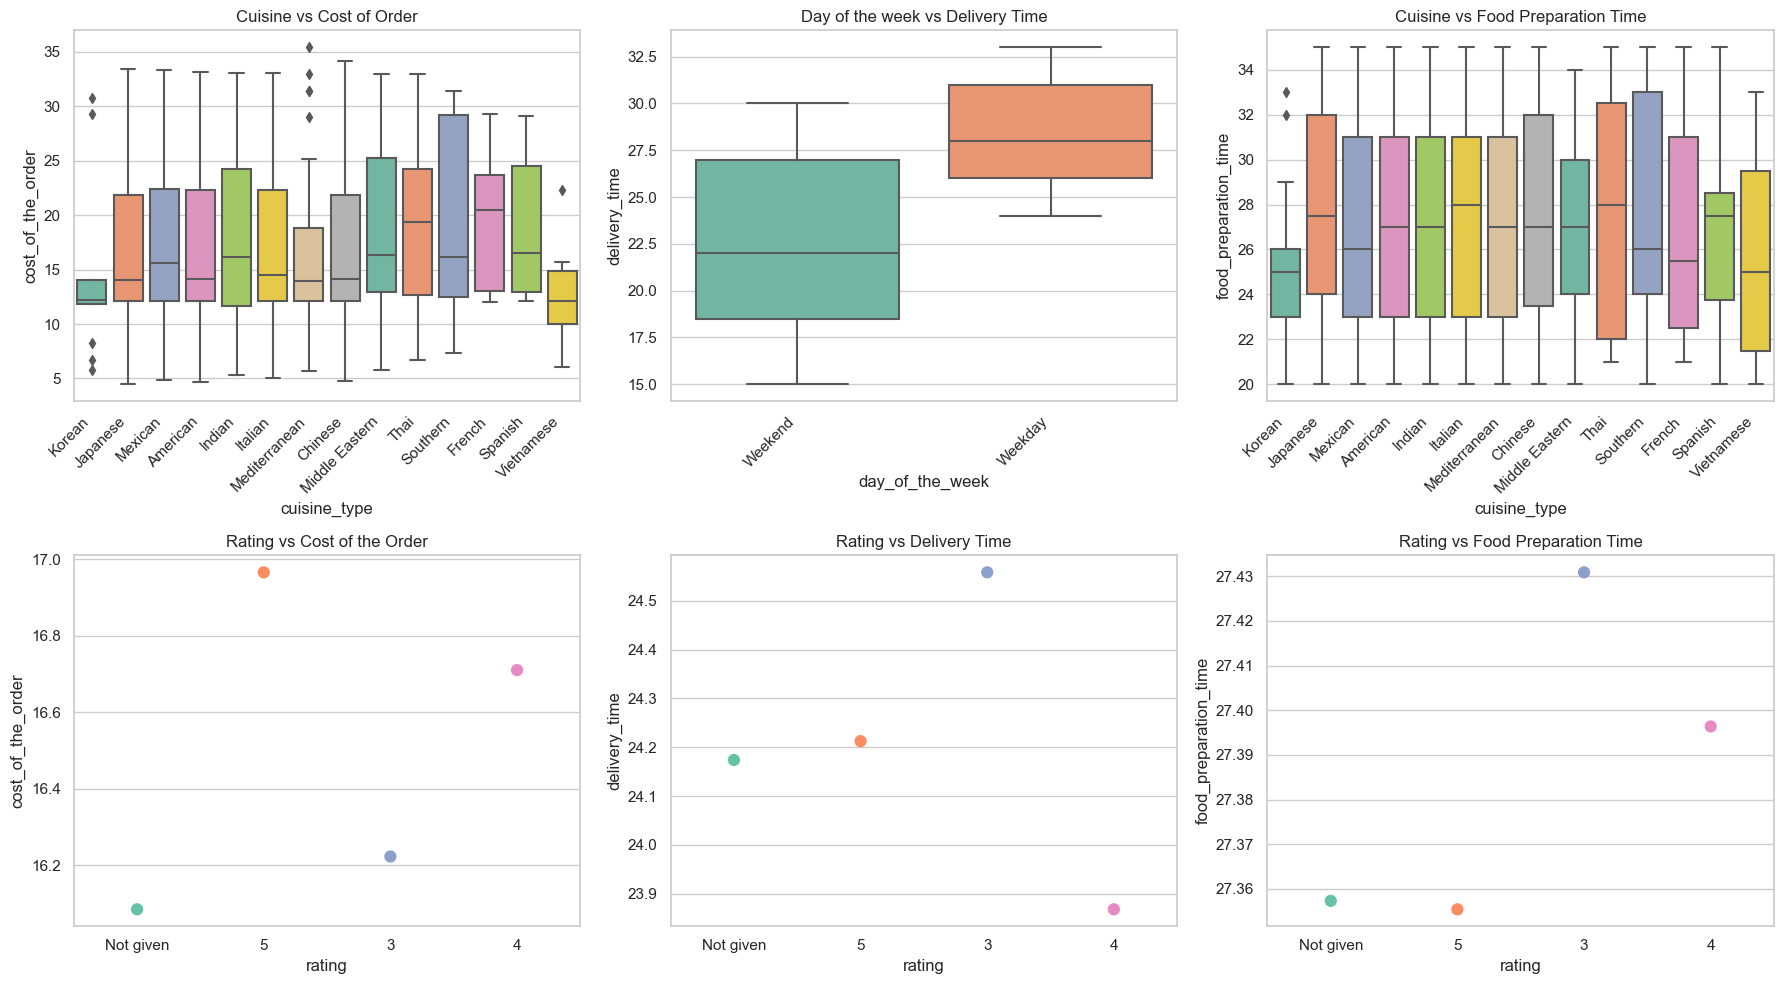

In [15]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots with three box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Box plot: Cuisine vs Cost of Order
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Cuisine vs Cost of Order')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')

# Box plot: Day of the week vs Delivery Time
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Day of the week vs Delivery Time')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')

# Box plot: Cuisine vs Food Preparation Time
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', ax=axes[0,2], palette='Set2')
axes[0,2].set_title('Cuisine vs Food Preparation Time')
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=45, ha='right')

# Point plot: Rating vs Cost of the Order
sns.pointplot(data=df, x='rating', y='cost_of_the_order', ax=axes[1,0], errorbar=None, palette='Set2')
axes[1,0].set_title('Rating vs Cost of the Order')

# Point plot: Rating vs Delivery Time
sns.pointplot(data=df, x='rating', y='delivery_time', ax=axes[1,1], errorbar=None, palette='Set2')
axes[1,1].set_title('Rating vs Delivery Time')

# Point plot: Rating vs Food Preparation Time
sns.pointplot(data=df, x='rating', y='food_preparation_time', ax=axes[1,2], errorbar=None, palette='Set2')
axes[1,2].set_title('Rating vs Food Preparation Time')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

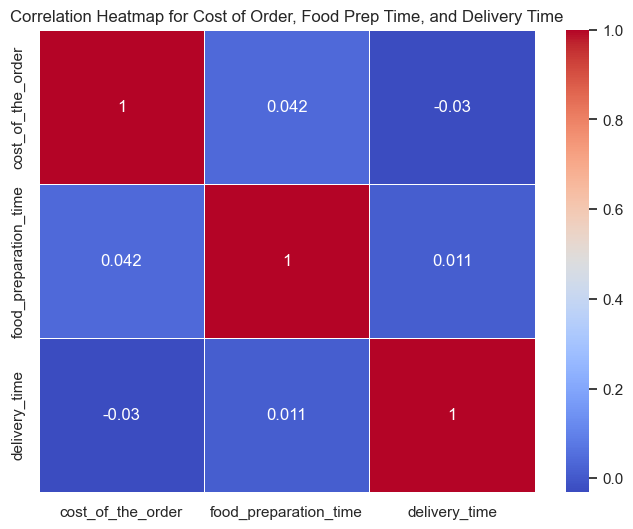

In [16]:
# Select the columns for the correlation heatmap
selected_columns = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]

# Create a correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Cost of Order, Food Prep Time, and Delivery Time')

# Show the heatmap
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [17]:
# Filter out 'Not Given' ratings
df = df[df['rating'] != 'Not given']

# Convert 'rating' column from object to integer
df['rating'] = df['rating'].astype(int)

# Create a DataFrame with restaurant names and rating counts
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants meeting the criteria
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the names of promotional restaurants
print(promotional_restaurants[['restaurant_name', 'count', 'mean']])

               restaurant_name  count      mean
16   Blue Ribbon Fried Chicken     64  4.328125
17           Blue Ribbon Sushi     73  4.219178
117                Shake Shack    133  4.278195
132          The Meatball Shop     84  4.511905


#### Observations:
The restaurants that have a rating count of over 50 and average above a 4 are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop. The Meatball Shop has the highest average rating while Shake Shack has the most amount of ratings.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [18]:
# Define the commission rates
commission_rate_high = 0.25  # 25% for orders with a cost greater than $20
commission_rate_low = 0.15   # 15% for orders with a cost greater than $5

# Calculate commission for each order
df['commission'] = df.apply(lambda row: row['cost_of_the_order'] * commission_rate_high if row['cost_of_the_order'] > 20 else (row['cost_of_the_order'] * commission_rate_low if row['cost_of_the_order'] > 5 else 0), axis=1)

# Calculate the total revenue generated by the company
total_revenue = df['commission'].sum()

# Calculate the net revenue
net_revenue = df['cost_of_the_order'].sum() - total_revenue

# Display the net revenue
print("Net Revenue: ${:.2f}".format(net_revenue))

Net Revenue: $15610.44


#### Observations:
The net revenue is $15,610.44. Since the net revenue is positive, Foodhub is making profit.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [19]:
# Calculate the total time required for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes
orders_over_60_minutes = len(df[df['total_time'] > 60])

# Calculate the percentage of orders that take more than 60 minutes
total_orders = len(df)
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

# Display the percentage of orders that take more than 60 minutes
print("Percentage of orders taking more than 60 minutes: {:.2f}%".format(percentage_over_60_minutes))

Percentage of orders taking more than 60 minutes: 10.24%


#### Observations:
Out of all the orders being places, roughly 10.24% of them take longer than an hour. I would consider 10% to be a rather large percentage and can be a place of improvement. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [20]:
# Write the code here

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Display the mean delivery times for weekdays and weekends
print("Mean Delivery Time on Weekdays: {:.2f} minutes".format(mean_delivery_time_weekday))
print("Mean Delivery Time on Weekends: {:.2f} minutes".format(mean_delivery_time_weekend))

Mean Delivery Time on Weekdays: 28.31 minutes
Mean Delivery Time on Weekends: 22.44 minutes


#### Observations:
The average delivery time differs between weekdays and weekends. Weekdays takes a bit longer at 28.31 minutes (28 minutes and 18.6 seconds) while weekends take 22.44 minutes (22 minutes and 26.4 seconds). Some factors that could be leading to the increase in delivery times during the weekdays are traffic, less drivers, etc.

### Conclusion and Recommendations

### Conclusions:
*  While Foodhub is profiting and moving in the right direction, there areas of improvement that can be addressed.
* One of the areas that could be addressed is their lack of diverse cuisine selections. While there are many different categories to choose from, American food seems to dominate the selection. We can see one of the top restaurants is a sushi restaurant, so we might be able to assume customer taste doesn't directly affect this statsitic.
* There are 736 orders that have not been rated.
* Only about 29% of orders cost more than 20 dollars.
* The 4 restaurants with the most orders received are also the the top 4 restaurants in terms of ratings. Those restaurants are Shake Shack, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, and The Meatball Shop. 
* Parm is amongst the top 5 restaurants to order from however they either don't have enough ratings or their ratings do not average more than 4 stars.
* The company is profitable so far with 15,610.44 in net revenue.
* Delivery times are longer on average on weekdays compared to weekends.
* Southern cuisine has high cost and high preparation time. However that does not apply to all restaurants. For example, Japanese food has long preparation times, but the cost is lower. 
* Japanese food is also one of the most ordered foods on the app.
* Mediterranean food has many outliers of high cost. 
* There seems to be a strong correlation with ratings and cost of the order, indicating customers do not have a problem with price as long as the food is good. 
* Many 3 star ratings are a result of long delivery times and long prepartion times. 

### Recommendations:

- <b>Encourage Customer Ratings</b>: Implement strategies to encourage customers to rate their orders. Offer incentives, such as discounts or promotions, for leaving feedback. Use customer feedback to identify areas of improvement.

- <b>Promote Top Restaurants</b>: Promote the top restaurants that receive the most orders. Highlight their special dishes and offers to attract more customers.

- <b>Diversify Cuisine Selection</b>: Offer a wider variety of cuisine types to cater to different customer preferences. Consider partnerships with restaurants offering cuisines that are currently underrepresented.

- <b>Optimize Delivery Times</b>: Analyze factors that lead to longer delivery times, especially during weekdays. Optimize delivery routes, increase driver availability during peak hours, and utilize real-time traffic data to improve efficiency.

- <b>Enhance Cost-effective Options</b>: Increase the percentage of 'expensive orders' by providing special deals and promotions for higher-cost items or restaurants.

- <b>Customer Engagement</b>: Engage with customers through marketing campaigns, loyalty programs, and social media to increase customer retention and satisfaction.

- <b>Quality Control</b>: Work with partner restaurants to ensure food preparation times are consistent and meet quality standards.

- <b>Customer Support</b>: Offer responsive customer support to address any issues or delays in orders. Keep customers informed about the status of their orders.

- <b>Driver Training</b>: Provide training to delivery personnel to optimize delivery routes and reduce delivery times. 

- <b>Traffic Analysis</b>: Use traffic analysis tools to predict and plan for peak traffic times, ensuring faster and more reliable deliveries.

---